In [206]:
#import necessary libraries
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
from scipy.stats import chi2_contingency
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, mean_absolute_error, r2_score, accuracy_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

1. Import the 2 datasets

In [207]:
heart = pd.read_csv('heart.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [208]:
insurance = pd.read_csv('insurance.csv')
insurance.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


2. Rename column 'target' to 'heart disease' in heart data frame

In [209]:
heart.rename(columns={'target':'heart_disease'},inplace = True)
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_disease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


3. In 'insurance' data frame, map encode gender to Female - 0 and male - 1

In [210]:
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [211]:
gender = {'male': 1,'female': 0}
insurance['sex'] = insurance['sex'].map(gender)
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,northwest,10600.54830
1334,18,0,31.920,0,no,northeast,2205.98080
1335,18,0,36.850,0,no,southeast,1629.83350
1336,21,0,25.800,0,no,southwest,2007.94500


4. Explore each data frame using at least 2 data exploratory tools and interpret observation in markdown cell

In [212]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_disease
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [213]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            303 non-null    int64  
 1   sex            303 non-null    int64  
 2   cp             303 non-null    int64  
 3   trestbps       303 non-null    int64  
 4   chol           303 non-null    int64  
 5   fbs            303 non-null    int64  
 6   restecg        303 non-null    int64  
 7   thalach        303 non-null    int64  
 8   exang          303 non-null    int64  
 9   oldpeak        303 non-null    float64
 10  slope          303 non-null    int64  
 11  ca             303 non-null    int64  
 12  thal           303 non-null    int64  
 13  heart_disease  303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [214]:
insurance.describe()

,age,sex,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,13270.422265
std,14.049960,0.500160,6.098187,1.205493,12110.011237
min,18.000000,0.000000,15.960000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,63770.428010


In [215]:
insurance.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

5. Utilize 2 common colummns from both data frames to form a singular dataframe called 'df_all'

In [216]:
df_all = pd.merge(heart,insurance,on=['age','sex'],how = 'inner')
df_all = df_all.drop_duplicates()
df_all

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_disease,bmi,children,smoker,region,charges
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,28.310,0,no,northwest,13770.09790
1,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,35.090,0,yes,southeast,47055.53210
2,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,41.470,0,no,southeast,13405.39030
3,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,36.765,0,no,northeast,13981.85035
4,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,41.325,3,no,northwest,15555.18875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3418,59,0,0,174,249,0,1,143,1,0.0,1,0,2,0,32.100,3,no,southwest,14007.22200
3419,59,0,0,174,249,0,1,143,1,0.0,1,0,2,0,31.350,0,no,northwest,12622.17950
3420,59,0,0,174,249,0,1,143,1,0.0,1,0,2,0,26.695,3,no,northwest,14382.70905
3421,59,0,0,174,249,0,1,143,1,0.0,1,0,2,0,27.500,0,no,southwest,12233.82800


In [217]:
df_all.shape

(3411, 19)

6. Visualize the age distribution of column 'age' in data frame 'df_all' and 'heart'

<AxesSubplot:ylabel='Frequency'>

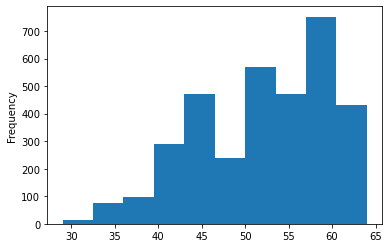

In [218]:
df_all['age'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

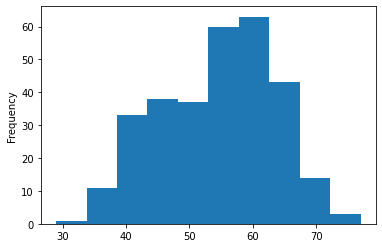

In [219]:
heart['age'].plot.hist()

7. What effect did the combination of 2 data frames have on age distribution?

Elder people were mostly the one having access to the facilities as they were the one's mostly with insurance.

8. Isolate all numerical column to list called 'numerical continuous'

In [220]:
df_all.dtypes

age                int64
sex                int64
cp                 int64
trestbps           int64
chol               int64
fbs                int64
restecg            int64
thalach            int64
exang              int64
oldpeak          float64
slope              int64
ca                 int64
thal               int64
heart_disease      int64
bmi              float64
children           int64
smoker            object
region            object
charges          float64
dtype: object

In [221]:
numerical_continuous = []
for column in df_all.columns:
    if df_all[column].dtypes != 'object':
        if df_all[column].nunique() >= 10:
            numerical_continuous.append(column)
numerical_continuous.remove('charges')
numerical_continuous

['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'bmi']

9. Create a list containing numerical discrete columns in 'numerical_discrete'

In [222]:
numerical_discrete = []
for column in df_all.columns:
    if df_all[column].dtypes != 'object':
        if df_all[column].nunique() < 10:
            numerical_discrete.append(column)
numerical_discrete.remove('heart_disease')
numerical_discrete

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'children']

10. Visually identify if there any outliers in the columns and resolve using a zscore test and a pvalue threshold of choice

<AxesSubplot:>

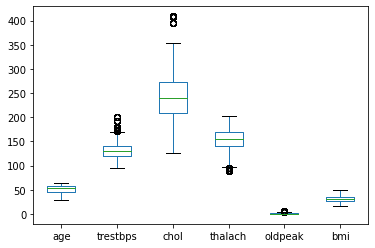

In [223]:
df_all[numerical_continuous].plot.box()

<AxesSubplot:>

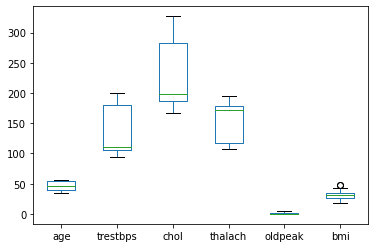

In [224]:
from scipy import stats
pvalue = 0.7
zscore = np.abs(stats.zscore(df_all[['trestbps','chol','thalach','oldpeak']]))
df_all[(zscore > pvalue).all(axis=1)][numerical_continuous].plot.box()          

11. Validate above analysis by visualizing the distribution in resulting columns using appropriate visualization

<AxesSubplot:>

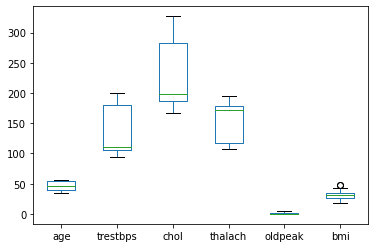

In [225]:
pvalue = 0.7
zscore = np.abs(stats.zscore(df_all[['trestbps','chol','thalach','oldpeak']]))
df_all[(zscore > pvalue).all(axis=1)][numerical_continuous].plot.box() 

12. Assuming 'charges' is your target for regression analysis. Feature select the best 'numerical_continuous' columns using backward elimination

In [226]:
import statsmodels.api as sm

df_all = df_all[(zscore > pvalue).all(axis=1)]

var = numerical_continuous
pmax = 1
while (len(var) > 0):
    p=[]
    x1 = df_all[var]
    x1 = sm.add_constant(x1)
    model = sm.OLS(df_all['charges'],x1).fit()
    p = pd.Series(model.pvalues.values[1:],index=var)
    pmax = max(p)
    feature_with_pmax = p.idxmax()
    if(pmax>0.05):
        var.remove(feature_with_pmax)
    else:
        break
numerical_continuous_selected = var
print(numerical_continuous_selected)

['age', 'oldpeak']


13. Isolate all categorical columns into 'categorical'

In [227]:
categorical = []
for column in df_all.columns:
    if df_all[column].dtypes == 'object':
        categorical.append(column)
categorical

['smoker', 'region']

14. Assuming 'heart disease' is target for classification analysis, run chi contigency test to identify best categorical and numerical_discrete features to proceed with analysis

In [228]:
from scipy.stats import chi2_contingency

chi2_check = []
for i in categorical + numerical_discrete:
    if chi2_contingency(pd.crosstab(df_all['heart_disease'], df_all[i]))[1] < 0.05:
        chi2_check.append('Reject Null Hypothesis')
    else:
        chi2_check.append('Fail to Reject Null Hypothesis')
res = pd.DataFrame(data = [categorical + numerical_discrete, chi2_check]).T 
res.columns = ['Column', 'Hypothesis']
print(res)

      Column                      Hypothesis
0     smoker  Fail to Reject Null Hypothesis
1     region  Fail to Reject Null Hypothesis
2        sex          Reject Null Hypothesis
3         cp          Reject Null Hypothesis
4        fbs          Reject Null Hypothesis
5    restecg          Reject Null Hypothesis
6      exang          Reject Null Hypothesis
7      slope          Reject Null Hypothesis
8         ca          Reject Null Hypothesis
9       thal          Reject Null Hypothesis
10  children  Fail to Reject Null Hypothesis


In [229]:
categorical_selected = res[res.Hypothesis != 'Fail to Reject Null Hypothesis'].Column.tolist()
categorical_selected

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

15. Using ColumnTransformer, OneHotEncode the categorical columns

In [230]:
from sklearn.compose import ColumnTransformer

ohe = OneHotEncoder()

ct =  ColumnTransformer(
        (ohe, ['smoker','region'])
        )

ct.fit_transform(df_all)

TypeError: 'OneHotEncoder' object is not iterable

# Assignment 8

1. Separate df_all to 2 dataframes df_regression and df_classification having all features but only the respective target column

In [231]:
df_regression = df_classification = df_all[numerical_continuous_selected + categorical_selected]

df_regression['charges'] = df_all['charges']
df_classification['heart_disease'] = df_all['heart_disease']

2. Model the data effectively for the ML

In [232]:
X = df_all[numerical_continuous_selected + categorical_selected].values
y_reg = df_regression[['charges']].values
y_class = df_classification[['heart_disease']].values

In [233]:
X_train,X_test,y_reg_train,y_reg_test = train_test_split(X,y_reg,test_size = 0.2,random_state = 0)
X_train,X_test,y_class_train,y_class_test = train_test_split(X,y_class,test_size = 0.2,random_state = 0)

In [234]:
scaler = StandardScaler()
mn = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_reg_train = mn.fit_transform(y_reg_train)
y_reg_test = mn.transform(y_reg_test)

3. Identify the best algorithm for each use case from ML methods under consideration for each task. Decision is based on training and prediction time, training and testing score

In [235]:
log_reg = LogisticRegression(random_state = 0)
svm_clf = SVC(random_state = 0)
knn_clf = KNeighborsClassifier()
rf_clf = RandomForestClassifier(random_state = 0)

lin_reg = LinearRegression()
dt_reg = DecisionTreeRegressor(random_state = 0)
bag_reg = BaggingRegressor(random_state = 0) 
boost_reg = AdaBoostRegressor(random_state = 0)

In [236]:
mlp_clf = Sequential()

mlp_clf.add(Input(shape = (X.shape[1])))

mlp_clf.add(Dense(32, activation = 'relu'))
mlp_clf.add(Dense(32, activation = 'relu'))

mlp_clf.add(Dense(1, activation = 'sigmoid'))

mlp_clf.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [237]:
mlp_reg = Sequential()

mlp_reg.add(Input(shape = (X.shape[1])))

mlp_reg.add(Dense(32, activation = 'relu'))
mlp_reg.add(Dense(32, activation = 'relu'))

mlp_reg.add(Dense(1, activation = 'linear'))

mlp_reg.compile(loss = 'mse', optimizer = 'Adam')

In [238]:
classification_models = {'ML': {'LogisticRegression': log_reg, 'SVC': svm_clf, 'KNeighborsClassifier': knn_clf, 
                                'RandomForestClassifier': rf_clf}, 
                         'DL': {'MLPClassifier': mlp_clf}}

regression_models = {'ML': {'LinearRegression': lin_reg, 'DecisionTreeRegressor': dt_reg, 'BaggingRegressor': bag_reg, 
                            'AdaBoostRegressor': boost_reg}, 
                     'DL': {'MLPRegressor': mlp_reg}}

In [244]:
def model_training_testing(models, X, y, process = 'training', method = 'Classification'):
    for method_, models_set in models.items():
        for model_name, model in models_set.items():
            if process == 'training':
                if method_ == 'ML':
                    try:
                        %%time
                        model.fit(X, y)
                    except:
                        pass
                else:
                    try:
                        %%time
                        history = model.fit(X, y, batch_size = 5, epochs = 10, verbose = 0)
                    except:
                        pass
                print(f'Model Name: {model_name}')
            elif process == 'testing':
                %%time
                y_predict = model.predict(X)

                if method == 'Classification': 
                    print(f'{model_name} Accuracy:', accuracy_score(y, np.round(y_predict)))
                else:
                    print(f'{model_name} Accuracy:', r2_score(y, y_predict))

In [245]:
model_training_testing(classification_models, X_train, y_class_train, process = 'training', method = 'Classification')

Model Name: LogisticRegression
Model Name: SVC
Model Name: KNeighborsClassifier
Model Name: RandomForestClassifier
Model Name: MLPClassifier


In [241]:
model_training_testing(regression_models, X_train, y_reg_train, process = 'training', method = 'Regression')

Model Name: LinearRegression
Model Name: DecisionTreeRegressor
Model Name: BaggingRegressor
Model Name: AdaBoostRegressor
Model Name: MLPRegressor


In [242]:
model_training_testing(classification_models, X_test, y_class_test, process = 'testing', method = 'Classification')

UsageError: Line magic function `%%time` not found.


In [243]:
model_training_testing(regression_models, X_test, y_reg_test, process = 'testing', method = 'Regression')

UsageError: Line magic function `%%time` not found.


4. When best model has been identified, use GridSearch to identify best hyper parameters

In [246]:
log_reg_pipeline = Pipeline([('log_reg_clf', LogisticRegression(penalty = 'l2', C = 1, tol = 0.0001, random_state = 0, n_jobs = -1))]) 
log_reg_params = {'log_reg_clf__penalty': ['l1', 'l2', 'elasticnet', 'none'], 
                  'log_reg_clf__C': [0.1, 0.5, 1, 5, 10], 
                  'log_reg_clf__tol': [0.0001, 0.001, 0.01, 0.1], 
                  'log_reg_clf__random_state': [0], 
                  'log_reg_clf__n_jobs': [-1]} 

bagg_reg_pipeline = Pipeline([('bagg_reg', BaggingRegressor(base_estimator = DecisionTreeRegressor(), n_estimators = 10, random_state = 0, n_jobs = -1))]) 
bagg_reg_params = {'bagg_reg__base_estimator': [DecisionTreeRegressor(), RandomForestRegressor()], 
                   'bagg_reg__n_estimators': [10, 100, 1000, 10000], 
                   'bagg_reg__random_state': [0], 
                   'bagg_reg__n_jobs': [-1]} 

In [247]:
log_reg_grid = GridSearchCV(log_reg_pipeline, log_reg_params, n_jobs = -1, cv = 5, verbose = 0, scoring = 'accuracy') 
best_log_reg = log_reg_grid.get_params() 

for k in sorted(log_reg_params.keys()): 
    print('\t{a}: \t {b}'.format(a = k, b = best_log_reg['estimator__' + k]))

	log_reg_clf__C: 	 1
	log_reg_clf__n_jobs: 	 -1
	log_reg_clf__penalty: 	 l2
	log_reg_clf__random_state: 	 0
	log_reg_clf__tol: 	 0.0001


In [249]:
bagg_reg_grid = GridSearchCV(bagg_reg_pipeline, bagg_reg_params, n_jobs = -1, cv = 5, verbose = 0, scoring = 'r2_score') 
best_bagg_reg = bagg_reg_grid.get_params() 

for k in sorted(bagg_reg_params.keys()): 
    print('\t{a}: \t {b}'.format(a = k, b = best_bagg_reg['estimator__' + k]))

	bagg_reg__base_estimator: 	 DecisionTreeRegressor()
	bagg_reg__n_estimators: 	 10
	bagg_reg__n_jobs: 	 -1
	bagg_reg__random_state: 	 0


In [250]:
log_reg_tuned = LogisticRegression(penalty = 'l2', C = 1, tol = 0.0001, random_state = 0, n_jobs = -1)
bag_reg_tuned = BaggingRegressor(base_estimator = DecisionTreeRegressor(), n_estimators = 10, random_state = 0, n_jobs = -1) 

5. Set up new instance of both regression and classification model with identified parameters, train models and report both training and testing cross validation mean score and standard deviation over 5 crossfolds

In [251]:
def cross_valid(model, X, y, model_name, process = 'Training'):
    scores = cross_val_score(model, X, y, cv = 5)
    print(f'Model: {model_name}')
    print(f'Process: {process}')
    print(f'Cross validation mean score: {round(np.mean(scores), 4)}')
    print(f'Cross validation deviation: {round(np.std(scores), 4)}')

In [252]:
cross_valid(log_reg_tuned, X_train, y_class_train, model_name = 'LogisticRegressionTuned', process = 'Training')

Model: LogisticRegressionTuned
Process: Training
Cross validation mean score: 1.0
Cross validation deviation: 0.0


In [253]:
cross_valid(bag_reg_tuned, X_train, y_reg_train, model_name = 'BaggingRegressorTuned', process = 'Training')

Model: BaggingRegressorTuned
Process: Training
Cross validation mean score: -1.5575
Cross validation deviation: 2.7882


In [254]:
cross_valid(log_reg_tuned, X_test, y_class_test, model_name = 'LogisticRegressionTuned', process = 'Testing')

Model: LogisticRegressionTuned
Process: Testing
Cross validation mean score: 1.0
Cross validation deviation: 0.0


In [255]:
cross_valid(bag_reg_tuned, X_test, y_reg_test, model_name = 'BaggingRegressorTuned', process = 'Testing')

Model: BaggingRegressorTuned
Process: Testing
Cross validation mean score: -1.7695
Cross validation deviation: 2.4338


6.  Using following metrics, report testing accuracy of models using

a)Classification:
    
i) classification report

ii)Heatmap confusion matrix

In [256]:
def model_evaluation(model, X, y, model_name, method = 'Classification'):
    y_predict = model.predict(X)
    if method == 'Classification':
        print(f'Model: {model_name} \n \n Classification Report: {classification_report(y, y_predict)}')

        cnf_matrix = confusion_matrix(y, y_predict)
        class_names = [0, 1, 2]
        tick_marks = np.arange(len(class_names))
        plt.figure(figsize = (9, 7))

        sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = "YlGnBu", fmt = 'g')

        plt.tight_layout()
        plt.title(f'{model_name} Confusion Matrix', y = 1.1, fontsize = 22)
        plt.ylabel('Actual Label', fontsize = 15)
        plt.xlabel('Predicted Label', fontsize = 15)
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
    else:
        y, y_predict = mn.inverse_transform(y.reshape(-1, 1)), mn.inverse_transform(y_predict.reshape(-1, 1))
        print(f'Mean Squared Error: {mean_squared_error(y, y_predict)}')
        print(f'Mean Absolute Error: {mean_absolute_error(y, y_predict)}')
        print(f'R2 Score: {r2_score(y, y_predict)}')

In [258]:
log_reg_tuned.fit(X_train, y_class_train)
bag_reg_tuned.fit(X_train, y_reg_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_jobs=-1,
                 random_state=0)

Model: LogisticRegressionTuned 
 
 Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



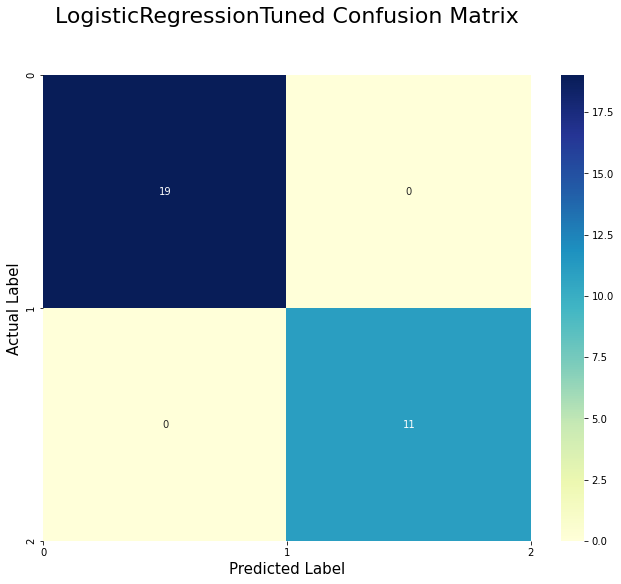

In [259]:
model_evaluation(log_reg_tuned,X_test,y_class_test,model_name='LogisticRegressionTuned',method='Classification')

b) Regression:

i)Mean absolute error

ii)Mean squared error

iii)R2 score

In [260]:
model_evaluation(bag_reg_tuned, X_test, y_reg_test, model_name = 'BaggingRegressorTuned', method = 'Regression')

Mean Squared Error: 114590092.82971716
Mean Absolute Error: 7500.380683576469
R2 Score: 0.11971257119211798


7. Save both model as pickle with following

a)'regression_model'




In [261]:
pickle.dump(log_reg_tuned, open("classification_model.pk","wb"))

b)'classification_model'

In [262]:
pickle.dump(log_reg_tuned, open("regression_model.pk","wb"))